**Students' name:**

**Camille Pittet (326866), Renuka Singh Virk (326470)**

This aim of this course is to review the evolution of image processing tools, from basics to deep learning algorithms. The semester is split into four labs :

* **Lab 1** : Introduction to Image Processing
* **Lab 2** : Object detection
* **Lab 3** : Object tracking
* **Lab 4** : Introduction to Deep Learning 


Let's start with the first chapter of this course!

# Chapter 1 : Introduction to Image Processing

(100 points)


In [29]:
import cv2 as cv
import numpy as np
import os
import math
from utils import *
import matplotlib.pyplot as plt
%matplotlib inline

---
**Disclaimer:** had to use 


```python
_tracker_ctor = {
    'mil': cv2.legacy.TrackerMIL_create,
    'kcf': cv2.legacy.TrackerKCF_create,
    'tld': cv2.legacy.TrackerTLD_create,
    'medianflow': cv2.legacy.TrackerMedianFlow_create,
    'mosse': cv2.legacy.TrackerMOSSE_create,
    'goturn': cv2.TrackerGOTURN_create
}
```

instead of the original.



---
## 1.1 Introduction to Basic Image Processing Using OpenCV and NumPy

(20 points)

In this section we start with the basic image processing in Python.

**Goals:**

1. Read an image, access and modify pixel values
2. Change color space
3. Understand the concepts of histogram and histogram equalization


### 1.1.1 Read an image, access and modify pixel values

The code in the next section shows how you can load an image into the Jupyter notebook. 

In [30]:
# reading an image
img = cv.imread(os.path.join('.', 'data', 'matterhorn.jpg'))
print('Image has dimensions: {}'.format(img.shape))
print('There is a total of {} elements'.format(img.size))

Image has dimensions: (339, 509, 3)
There is a total of 517653 elements


OpenCV loads the image in a type of variable called a NumPy array. Elements of a NumPy array are accessed through indexing with the operator `[.]` where `.` indicates which dimensions you're accessing. The dimensions are organized as follows: `rows, cols, channels`. More information about indexing in NumPy is in the [doc](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html).

**QUESTION:** (/2)
- What do `rows, cols, channels` represent in the image? 
- What is the value of channels for grayscale and colored image? 
- Is the `matterhorn.jpg` image a grayscale or color image? Why? 
- What is the meaning of each channel when the image is loaded with OpenCV ([Hint](https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56))



---
**YOUR ANSWER** 
- rows: rows represent the vertical dimension of the image.
- cols: cols represent the horizontal dimension of the image.
e.g. if we have a 120x256 image, there are 120 rows (height) and 256 columns (width).
- channels: number of color components to form the final pixel, e.g. if we have channels=3 (BGR) there are 3 colors superimposed to form the final pixel.
- For grayscales there is 1 channel (0 being black and 255 being white), whereas for colored images there are 3 channels (blue, green, red in BGR format).
- The `matterhorn.jpg` is a colored image since it has 3 channels (can also be further checked by opening the file).
- When loaded with OpenCV, an image is in BGR format $\rightarrow$ the 1st channel is for the blue intensity, the 2nd for the green and the 3rd for the red.


---
In the next cell we display the image using the provided function `display_image()` in file `utils.py`.

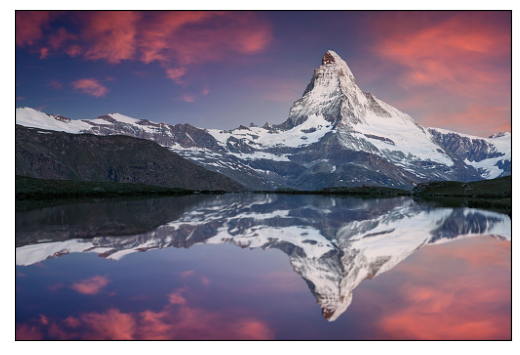

In [31]:
# Image can be displayed like this
display_image(img)
plt.show()

Now that you have an image loaded in the notebook, let's extract some properties from it. Here is how you can access a pixel or a region of the image, and modify a pixel value. 

In [32]:
pixel_row = 10 
pixel_col = 10

# accessing pixel (pixel_x, pixel_y) 
print('Pixel value at location {}x{} is {}'.format(pixel_row, pixel_col, img[pixel_row, pixel_col]))

# accessing region of the image starting at(pixel_row, pixel_col)
region_size = 10 
img_region = img[pixel_row:pixel_row+region_size, pixel_col:pixel_col+region_size]
print('Region size is {}'.format(img_region.shape))

# modifying pixel value
img[pixel_row, pixel_col] = [0, 0, 0]
print('New pixel value at location {}x{} is {}'.format(pixel_row, pixel_col, img[pixel_row, pixel_col]))


Pixel value at location 10x10 is [63 39 87]
Region size is (10, 10, 3)
New pixel value at location 10x10 is [0 0 0]


**QUESTION:** (/1)

In the next cell, change the color of the pixels to white in a rectangle of size (40, 100) starting from the pixel (30, 60) and show the new image.

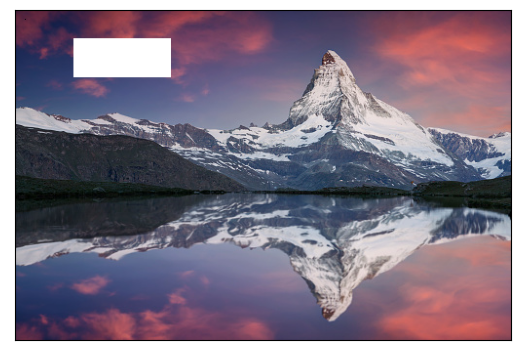

In [33]:
# modifying pixel value

## YOUR CODE HERE
pixel_row, pixel_col = 30, 60
v_region_size, h_region_size = 40, 100
img[pixel_row:pixel_row+v_region_size, pixel_col:pixel_col+h_region_size] = [255, 255, 255]

# Display the modified image with white rectangle
display_image(img);

### 1.1.2 Colorspace Conversion

Now, you will learn how to convert images from one colorspace to another, like BGR ↔ Gray, BGR ↔ YUV etc. There are more than 150 color-space conversion methods available in OpenCV. 

**QUESTION:** (/4)

In the next two cells, implements the conversion function going from BGR image to GRAY image and BGR to YUV image. There are built-in functions in OpenCV doing exactly that but for the moment we'll ask you to implement your **own** function in order to get the idea of what is happening under the hood.

---
From the [documentation](https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html#color_convert_rgb_gray), we find that the conversion from RGB to GRAY is done as 
$$
\text{Y}←0.299⋅\text{R}+0.587⋅\text{G}+0.114⋅\text{B}
$$

thus we can extract the three components (in our case B,G,R) and compute the corresponding gray (Y) intensity.

In [34]:
def convert_bgr_to_grayscale(frame):
    """
    Convert a given bgr image into grayscale image
    :param frame: Color image to convert
    :return: Grayscale image as numpy array
    """
    
    # YOUR CODE HERE 
    B = frame[:, :, 0].astype(float)
    G = frame[:, :, 1].astype(float)
    R = frame[:, :, 2].astype(float)
    image = 0.299 * R + 0.587 * G + 0.114 * B  

    return image.astype(np.float32)

---
From the [source code](https://github.com/egonSchiele/OpenCV/blob/master/modules/imgproc/src/color.cpp), we find that the conversion from BGR to YUV is done as 
$$
\text{Y}←0.299⋅\text{R}+0.587⋅\text{G}+0.114⋅\text{B} \\
\text{U}←0.492\text{(B-Y)}+128 \\
\text{V}←0.877\text{(R-Y)}+128 \\ 
$$

we thus implement the conversion in the function below.

In [35]:
def convert_bgr_to_yuv(frame):
    """
    Convert a given rgb image into hsv image
    :param frame: Color image to convert
    :return: YUV image as numpy array
    """
    
    # YOUR CODE HERE
    B = frame[:, :, 0].astype(float)
    G = frame[:, :, 1].astype(float)
    R = frame[:, :, 2].astype(float)
    Y = 0.299 * R + 0.587 * G + 0.114 * B
    U = 0.492 * (B-Y) + 128
    V = 0.877 * (R-Y) + 128
    
    image = np.stack([Y, U, V], axis=-1)
    image = np.clip(image, 0, 255)
    
    return image.astype(np.uint8)

The following lines shows the conversion based on your implementation and the built-in function from OpenCV. If everything went well, the two should match.

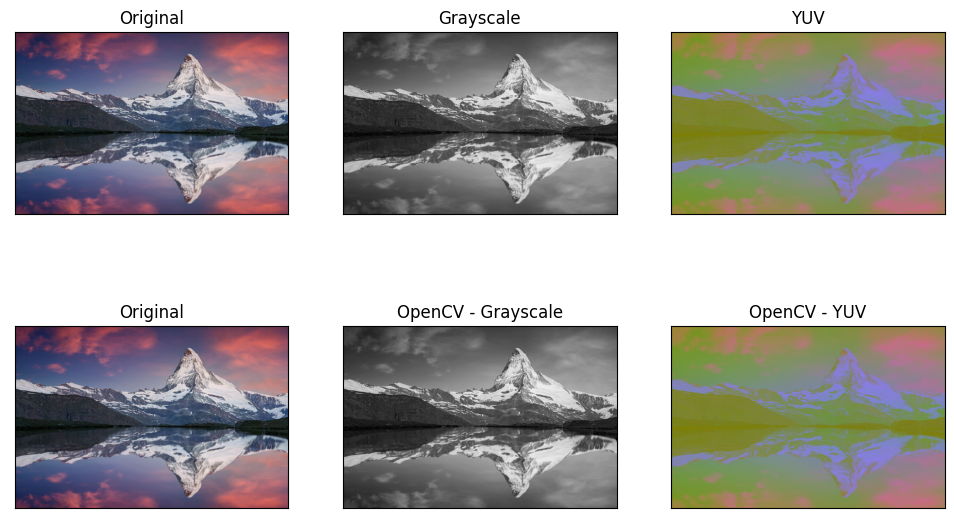

In [36]:
# Load image
img = cv.imread(os.path.join('.', 'data', 'matterhorn.jpg'))
# convert to gray + hsv
img_gray = convert_bgr_to_grayscale(img)
img_yuv = convert_bgr_to_yuv(img)
gt_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gt_yuv = cv.cvtColor(img, cv.COLOR_BGR2YUV)
# Display
fig, ax = plt.subplots(2, 3, figsize=(12, 7))
display_image(img, axes=ax[0][0])
ax[0][0].set_title('Original')
display_image(img_gray, axes=ax[0][1])
ax[0][1].set_title('Grayscale')
display_image(img_yuv, axes=ax[0][2])
ax[0][2].set_title('YUV')

display_image(img, axes=ax[1][0])
ax[1][0].set_title('Original')
display_image(gt_gray, axes=ax[1][1])
ax[1][1].set_title('OpenCV - Grayscale')
display_image(gt_yuv, axes=ax[1][2])
ax[1][2].set_title('OpenCV - YUV');
plt.show()

Now you know how to convert *BGR* image to any color space, you can use this to extract a colored object. In *HSV*, it is more easier to represent a color than in *BGR* colorspace. Here is the method to extract a colored object:

1. Reading an input image
2. Convert from *BGR* to *HSV* color-space using bluit-in function from OpenCV
3. We threshold the *HSV* image to extract the pixels in the desired color range. 

**QUESTION:** (/2)

First, implement the function `threshold_bgr_image()` to threshold the color image in the desired color range. 

**Hint**: You may use the OpenCV functions `inRange()` and `bitwise_and()`.

In [63]:
def threshold_bgr_image(frame, lower, upper):
    """
    Segment image.
        1. Convert image to HSV color space
        2. Find pixels in the desired color range (lower, upper)
        3. Apply the mask to the image. 
    :param frame: BGR image to segment
    :param lower: Lower threshold value
    :param upper: Upper threshold value
    :return res: Segmented image
    :return mask: binary mask
    """
    # Convert image to HSV color space
    frame_hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    
    # Find pixels in the desired color range (mask)
    mask = cv.inRange(frame_hsv, lower, upper)
    
    # Apply the mask to the image
    res = cv.bitwise_and(frame, frame, mask=mask)
    
    return res, mask

The next cell test your function on the blue pixels of the image.

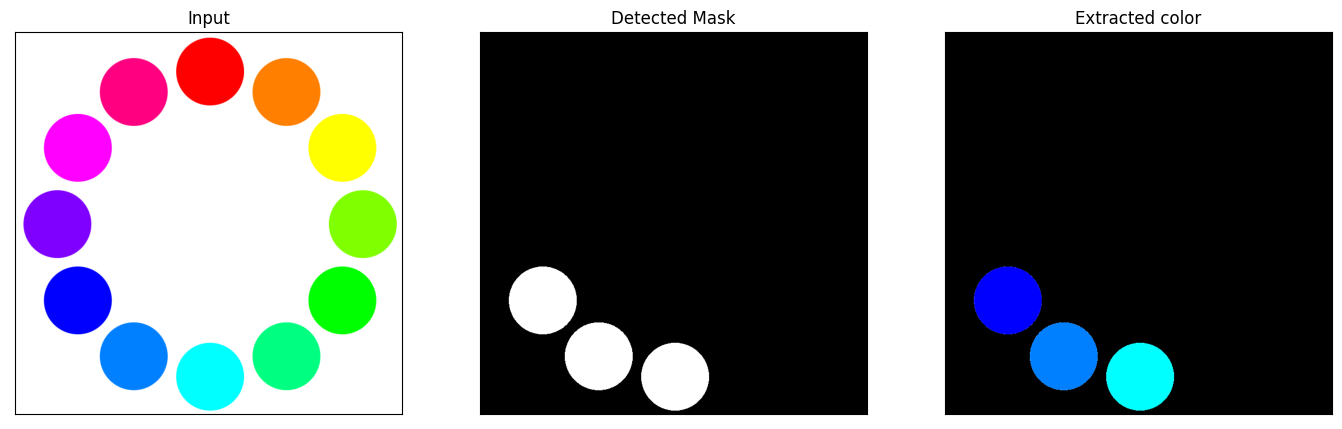

In [115]:
# 1. Read input
img = cv.imread(os.path.join('data', 'circles_color.png'))

# 2. Define range of blue color in HSV
lower = np.asarray([90,120,120])
upper = np.asarray([130,255,255])
im, mask = threshold_bgr_image(img, lower, upper)

# 3. Display using subplots
fig, ax = plt.subplots(1, 3, figsize=(17, 9))
display_image(img, axes=ax[0])
ax[0].set_title('Input')
display_image(mask, axes=ax[1], cmap='gray')
ax[1].set_title('Detected Mask')
display_image(im, axes=ax[2])
ax[2].set_title('Extracted color');
plt.show()

In order to find *HSV* values, you can use the same function, `cv.cvtColor()`. Instead of passing an image, you just pass the *BGR* values you want. The next cell shows an example to find the HSV value of red. 

In [116]:
red = np.uint8([[[0, 0, 255]]])
hsv_red = cv.cvtColor(red, cv.COLOR_BGR2HSV)
print( 'HSV component {}'.format(hsv_red))

HSV component [[[  0 255 255]]]


**QUESTION:** (/2)

Try to extract the **Yellow** circle. Comment and show the result.


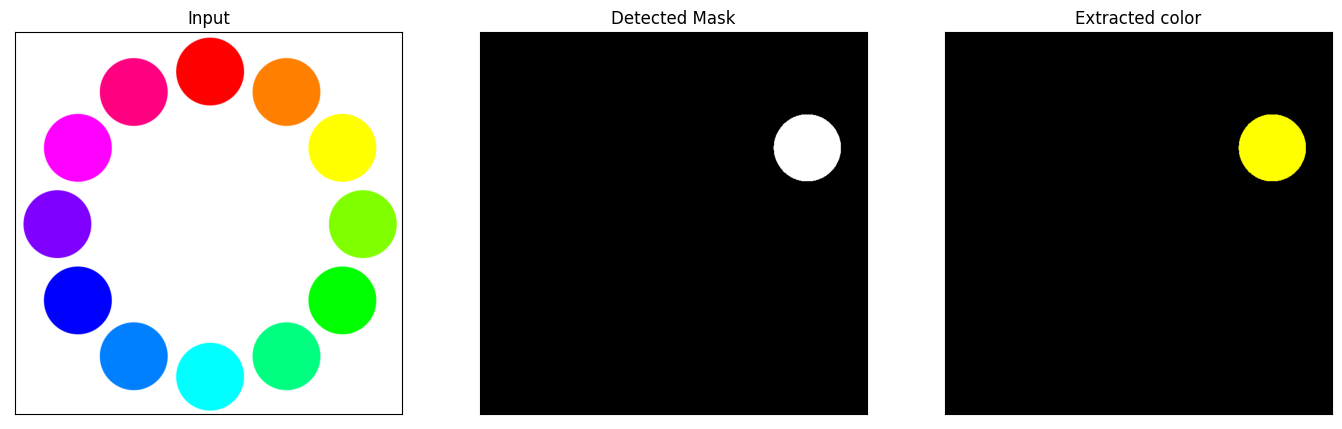

In [160]:
# 1. Read input
img = cv.imread(os.path.join('data', 'circles_color.png'))

lower = np.asarray([30,255,255])
upper = np.asarray([40,255,255])

### Your code here ### 
im, mask = threshold_bgr_image(img, lower, upper)

# 3. Display using subplots
fig, ax = plt.subplots(1, 3, figsize=(17, 9))
display_image(img, axes=ax[0])
ax[0].set_title('Input')
display_image(mask, axes=ax[1], cmap='gray')
ax[1].set_title('Detected Mask')
display_image(im, axes=ax[2])
ax[2].set_title('Extracted color')
plt.show()

---
**YOUR ANSWER**
The BGR components of yellow can vary, however we can assume the saturation and brightness are maximal and set them to 255.

For the H component, looking at the [color wheel](https://v6.robweychert.com/blog/2018/02/v6-color/) we see that the orange and yellow correspond to 30, respectively 60º. 
Thus we find the H components as follows:
$$
\text{H}_{\text{lower}} = \frac{30}{360} \cdot 255 = 21.25 \approx 20 
$$
$$
\text{H}_{\text{upper}} = \frac{60}{360} \cdot 255 = 42.5 \approx 40 
$$

Note that we must be careful not to select a range too large to not extract the light green and orange.

---
So far you have been working with color image, but you could apply the same approach with the grayscale image.

**QUESTION:** (/2)

Now, try to extract the **yellow** pencil using the grayscale image. What are the pros and cons of each method (colors *vs* grayscale)?

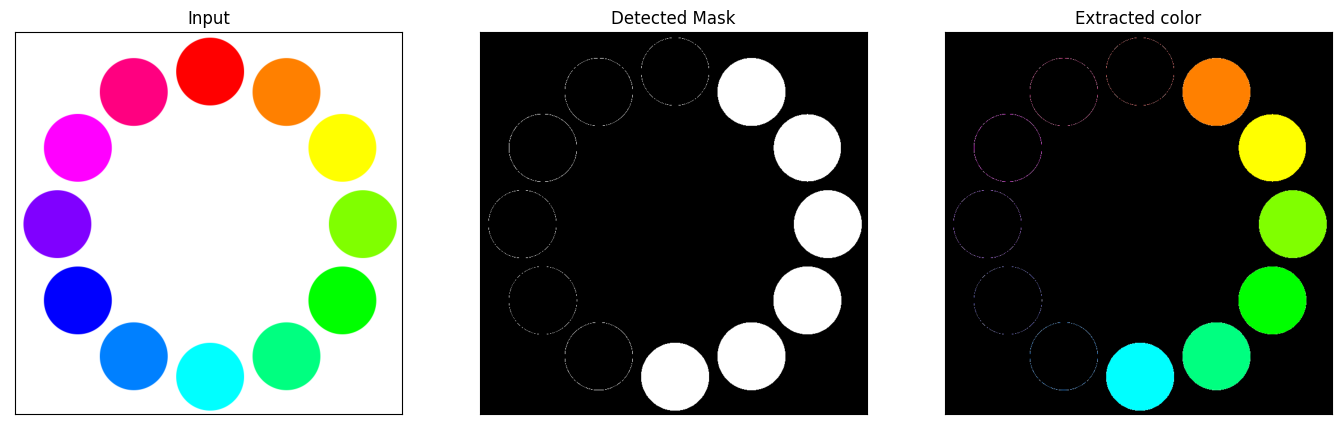

In [162]:
def threshold_gray_image(frame, lower, upper):
    """
    Segment image.
        1. Convert image to gray color space
        2. Find pixels in the desired color range (lower, upper)
        3. Apply the mask to the image. 
    :param frame: BGR image to segment
    :param lower: Lower threshold value
    :param upper: Upper threshold value
    :return: Segmented image, binary mask
    """
    
    # YOUR CODE HERE
    # Convert image to grayscale color space
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    # Find pixels in the desired color range (mask)
    mask = cv.inRange(frame_gray, lower, upper)
    
    # Apply the mask to the image
    res = cv.bitwise_and(frame, frame, mask=mask)
    return res, mask

# 1. Read input
img = cv.imread(os.path.join('data', 'circles_color.png'))

# 2. Extract yellow color in gray
lower_gray = 0.299 * 255 + 0.587 * 85
upper_gray = 0.299 * 255 + 0.587 * 255

# YOUR CODE 
im, mask = threshold_gray_image(img, lower_gray, upper_gray)
    
    
# 3. Display using subplots
fig, ax = plt.subplots(1, 3, figsize=(17, 9))
display_image(img, axes=ax[0])
ax[0].set_title('Input')
display_image(mask, axes=ax[1], cmap='gray')
ax[1].set_title('Detected Mask')
display_image(im, axes=ax[2])
ax[2].set_title('Extracted color')
plt.show()

---
**YOUR ANSWER**


Recall that for BGR to grayscale conversion we have
$$
\text{Y}←0.299⋅\text{R}+0.587⋅\text{G}+0.114⋅\text{B}
$$

Using the same values as before we find for the lower bound:
$$
\text{R} = 255; \ \text{G} = 85; \ \text{B} = 0 \\
\text{Y}_{\text{lower}}←0.299⋅\text{R}+0.587⋅\text{G}+0.114⋅\text{B} = 126.14
$$
and for the upper bound:
$$
\text{R} = 255; \ \text{G} = 255; \ \text{B} = 0 \\
\text{Y}_{\text{upper}}←0.299⋅\text{R}+0.587⋅\text{G}+0.114⋅\text{B} = 225.93
$$
How ever as can be seen on the plot above, the threshold is too large and our function detects all the colors from orange to light blue, thus HSV allows for more precision when dealing with colors.

---
### 1.1.3 Image Histogram

An histogram is a graph or plot, which gives you an overall idea about the intensity distribution of the pixels of the image. It is just another way of understanding the image. By looking at the histogram of an image, you get intuition about contrast, brightness, intensity distribution etc of that image. Almost all image processing tools today, provides features on histogram.

**QUESTION:** (/1)

In the next cell, implement a function using OpenCV that computes the image histogram for all channels.

In [ ]:
def compute_image_histogram(image):
    """
    Compute image color distribution for each channels of a given `image`
    :param image: Image to extract histograms for
    :return: List of histogram, one per channel.
    """
    hist = []
    
    # YOUR CODE HERE


    return hist

In [ ]:
# 1. Load image
img = cv.imread(os.path.join('..','data', 'matterhorn.jpg'))

# 2. Compute histogram for each channels
hists = compute_image_histogram(img)

# 3. Plot 
color = ['b', 'g', 'r']
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
display_image(img, axes=ax[0])
for k, hist in enumerate(hists):
    ax[1].plot(hist, color=color[k])
ax[1].set_title('Color Histogram by channels')
ax[1].set_xlim([0, 256])
ax[1].set_xlabel('Pixel Intensity')
ax[1].set_ylabel('Number of Pixel')
plt.legend(['Blue Channel', 'Green Channel', 'Red Channel'])
plt.show()

You can see the image and the corresponding histograms.

**QUESTION:** (/1)

What is the significant of the pixel intensity?


**YOUR ANSWER** 

#### Histogram equalization
Consider an image whose pixel values are confined to some specific range of values only. For instance, brighter image will have all pixels confined to high values. But a good image will have pixels from all regions of the image. So you need to stretch this histogram to either ends and that is what Histogram Equalization does. This normally improves the contrast of the image ([doc](https://en.wikipedia.org/wiki/Histogram_equalization)).

**QUESTION:** (/3)

In the next section implement such contrast enhancement function (i.e. based on histogram equalization)

In [ ]:
def contrast_enhancement(image):
    """
    Compute histogram and apply histogram equalization on a given image.
    :param image: Image to enhance contrast
    :return: tuple: enhanced image, input image histogram, transformed image histogram
    """
    
    hist = None
    hist_equ = None
    image_equ = None
    
    # Apply histogram equalization
    
    return image_equ, hist, hist_equ

The next cell shows you the results of histogram equalization on an image. 

**QUESTION:** (/2)

- How has the contrast evolved after applying the transformation ? 
- How has the histogram changed ?

In [ ]:
# Load image
img = cv.imread(os.path.join('..','data', 'matterhorn_snow.jpg'), cv.IMREAD_GRAYSCALE)

# Enhance contrast with histogram equalization
img_equ, hist, hist_equ = contrast_enhancement(img)

# Display
fig, ax = plt.subplots(2, 2, figsize=(17, 9))
display_image(img, axes=ax[0][0])
ax[0][0].set_title('Original')
# Histogram original
ax[0][1].bar(np.arange(hist.shape[0]), hist.reshape(-1),  width=1)
ax[0][1].set_xlim([0, 256])
ax[0][1].set_title('Histogram')
# Histogram equalized
display_image(img_equ, axes=ax[1][0])
ax[1][0].set_title('Histogram Equalized')
ax[1][1].bar(np.arange(hist_equ.shape[0]), hist_equ.reshape(-1),  width=1)
ax[1][1].set_xlim([0, 256])
ax[1][1].set_title('Histogram')
plt.show()


**YOUR ANSWER**

### 1.2 Image filtering and edges detection

(50 points)

Image filtering is a two-dimensional convolution of the image by a small matrix called kernel. The choice of the kernel depends on the goal of the filtering operation, which can be noise removal, edge detection, contrast enhancement, etc. In general, filters are classified into two families: low-pass filters and high-pass filters. 
 
### 1.2.1 Low-pass filters 

The most common low-pass filters are the [averaging filter](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37), the [Gaussian filter](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1) and the [median filter](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9). 

**QUESTION:** (/3)

In the next cell, implement the function `apply_lowpass_filter()`, which takes as input an image, and the filter parameters in a dictionary (filter type and size) and returns the filtered image. Use the corresponding OpenCV functions. 


In [ ]:
def apply_lowpass_filter(img, filter_params):
    """
    Apply a low-pass filter on a given image.
    :param image: Image to enhance contrast
    :param filter_params: Parameters of the filter
    :return: img_filt: filtered image
    """
    
    # YOUR CODE HERE
    
    
    return img_filt


The next cell tests your implementation on two images corrupted by a different noise, with a filter of size (7x7). 

**QUESTION:** (/2)

What is the effect of each filter? How different are the filtered images? Which filter is the best for each image and why? 

In [ ]:
# Load image
imgs = [cv.imread(os.path.join('..','data', 'matterhorn_noise1.jpg'), cv.IMREAD_GRAYSCALE), cv.imread(os.path.join('..','data', 'matterhorn_noise2.jpg'), cv.IMREAD_GRAYSCALE)]
img_title = ["Salt & Pepper", "Gaussian"]

# Filtering with a kernel of size 7x7
filter_size = 7 
filter_params = [ {"ftype":"averaging", "fsize":filter_size},
                 {"ftype":"gaussian", "fsize":filter_size},
                 {"ftype":"median", "fsize":filter_size}]


# Display image
fig, ax = plt.subplots(len(filter_params)+1, len(imgs), figsize=(20, 20))

for curr_img_idx, curr_img in enumerate(imgs):
    display_image(curr_img, axes=ax[0, curr_img_idx], cmap='gray')
    
    ax[0, curr_img_idx].set_title(img_title[curr_img_idx], fontsize=30)

    for curr_filt_idx, curr_filt in enumerate(filter_params):        
        img_filt = apply_lowpass_filter(curr_img, curr_filt)
        display_image(img_filt, axes=ax[curr_filt_idx+1, curr_img_idx], cmap='gray')
        ax[curr_filt_idx+1, curr_img_idx].set_title(curr_filt["ftype"], fontsize=30)
plt.show()


**YOUR ANSWER**

Now that you are able to filter an image, let's find the optimal kernel. In this question, we consider the optimal filter to be the one that produces a filtered image that is visually closest to the image without noise.

**QUESTION:** (/4)

For each image, propose an optimal kernel (type and size), justify your choice and show the filtered image. 

In [ ]:
# Load image
img_orig = cv.imread(os.path.join('..','data', 'matterhorn.jpg'), cv.IMREAD_GRAYSCALE)
imgs = [cv.imread(os.path.join('..','data', 'matterhorn_noise1.jpg'), cv.IMREAD_GRAYSCALE), cv.imread(os.path.join('..','data', 'matterhorn_noise2.jpg'), cv.IMREAD_GRAYSCALE)]
img_title = ["Salt & Pepper", "Gaussian"]

# Best filter parameters


###################
# YOUR CODE HERE
best_filter_params_1 = {}
best_filter_params_2 = {}
###################


# Filtering
img1_best = apply_lowpass_filter(imgs[0], best_filter_params_1)
img2_best = apply_lowpass_filter(imgs[1], best_filter_params_2)

# Display image
fig, ax = plt.subplots(1, 3, figsize=(30, 10))
display_image(img_orig, axes=ax[0], cmap='gray')
ax[0].set_title("Orignal image", fontsize=30)
display_image(img1_best, axes=ax[1], cmap='gray')
ax[1].set_title("Best filter - S&P Noise", fontsize=30)
display_image(img2_best, axes=ax[2], cmap='gray')
ax[2].set_title("Best filter - Gaussian noise", fontsize=30)
plt.show()


### 1.2.2 High-pass filters

The second family of filters are the high-pass filters. You will try two of them: the first-order [Sobel filter](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d) and the second order [Laplacian filter](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6).

We start with the first-order Sobel filter, more info is available in the [doc](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d). When using first-order filters, the kernel is applied in one direction, along the rows or the columns of the image. 

**QUESTION:** (/2)

In the next cell, implement the function `apply_sobel_filter` which takes as input an image, the
direction of filtering (`x` or `y`), and the filter size  and returns the filtered image. Use the corresponding OpenCV function with the parameter `ddepth=cv.CV_64F`. 


In [ ]:
def apply_sobel_filter(img, direction, filter_size):
    
    """
    Apply the sobel filter on a given image.
    :param img: Image to enhance contrast
    :param direction: Direction of the derivative
    :param filter_size: Size of the filter
    :return: img_filt: filtered image
    """
    
    # YOUR CODE HERE 
    
    return img_filt

The next cell tests your implementation with a filter of size (7x7) in both directions. 

**QUESTION:** (/2)

What are the differences between the filtered images? Why? 


In [ ]:
# Load image
img = cv.imread(os.path.join('..','data', 'matterhorn.jpg'), cv.IMREAD_GRAYSCALE)

# Sobel filtering
filter_size = 7

img_sobel_dx = apply_sobel_filter(img, "x", filter_size)
img_sobel_dy = apply_sobel_filter(img, "y", filter_size)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
display_image(img_sobel_dx, axes=ax[0], cmap='gray')
ax[0].set_title("Direction - dx", fontsize=30)
display_image(img_sobel_dy, axes=ax[1], cmap='gray')
ax[1].set_title("Direction - dy", fontsize=30)
plt.show()



**YOUR ANSWER**

Now, you will implement a second-order high-pass filter, the [Laplacian filter](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6). 

**QUESTION:** (/1)

In the next cell, implement the function `apply_laplacian_filter` which takes as input an image, and the filter size and returns the filtered image. Use the corresponding OpenCV function with the parameter `ddepth=cv.CV_64F`.  


In [ ]:
def apply_laplacian_filter(img, filter_size):
    """
    Apply a laplace filter on a given image.
    :param img: Image to enhance contrast
    :param filter_size: Size of the filter
    :return: img_filt: filtered image
    """
        
    # Laplacian filtering
    
    # YOUR CODE HERE
    
    return img_filt

The next cell tests your implementation with filters of size (1x1), (5x5) and (11x11). 

**QUESTION:** (/2)

What are the differences between the filtered images? Why? 


In [ ]:
# Load image
img = cv.imread(os.path.join('..','data', 'matterhorn.jpg'), cv.IMREAD_GRAYSCALE)

# Laplacian filtering
filter_size = [1, 5, 11]

fig, ax = plt.subplots(1, len(filter_size), figsize=(10*len(filter_size), 10))

for curr_filt_idx, curr_filt_size in enumerate(filter_size):
    img_laplacian = apply_laplacian_filter(img, curr_filt_size)
    display_image(img_laplacian, axes=ax[curr_filt_idx], cmap='gray')
    ax[curr_filt_idx].set_title("Filter size : {}".format(curr_filt_size), fontsize=30)

plt.show()



**YOUR ANSWER**

It is convenient to have one function for applying a high-pass filter, similarly to the function `apply_lowpass_filter()`. 

**QUESTION:** (/2)

In the next cell, implement the function `apply_highpass_filter()`, which takes as input an image and a dictionary of the filter parameters, and returns the filtered image. Use the functions you implemented in the previous cells. 

In [ ]:
def apply_highpass_filter(img, filter_params):
    
    """
    Apply a highpass filter on a given image.
    :param image: Image to enhance contrast
    :param filter_params: Parameters of the filter
    :return: img_filt: filtered image
    """
    
    # YOUR CODE HERE
    
    
    return img_filt



The next cell tests your implementation with an example of each high-pass filter. 

**QUESTION** (/3)

Comment the differences between the images. 


In [ ]:
# Load image
img = cv.imread(os.path.join('..','data', 'matterhorn.jpg'), cv.IMREAD_GRAYSCALE)


filter_size = 3

# Sobel filtering
sobel_params = {"ftype":"sobel", "direction": "x", "fsize": filter_size}

# Laplacian filtering 
laplacian_params = {"ftype":"laplacian", "fsize": filter_size}

highpass_params = [sobel_params, laplacian_params]

fig, ax = plt.subplots(1, len(highpass_params), figsize=(10*len(highpass_params), 10))

for curr_highpass_idx, curr_highpass_params in enumerate(highpass_params):
    img_filt = apply_highpass_filter(img, curr_highpass_params)
    display_image(img_filt, axes=ax[curr_highpass_idx], cmap='gray')
    ax[curr_highpass_idx].set_title(" Filter: {}".format(curr_highpass_params["ftype"]), fontsize=30)

plt.show()



### 1.2.3 Image Thresholding

Image tresholding consist in assigning a new value to a pixel given a threhsold. If the pixel value is greater than the threshold value, it is assigned one value (*maybe white*), else it is assigned another value (*maybe black*). The function used is `cv.threshold(<image>, <thresh>, <maxVal>, <type>)`. First argument is the source image, which should be a grayscale image. Second argument is the threshold value which is used to classify the pixel values. Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function. Different types are:

1. `cv.THRESH_BINARY`
2. `cv.THRESH_BINARY_INV`
3. `cv.THRES_TRUNC`
4. `cv.THRESH_TOZERO`
5. `cv.THRESH_TOZERO_INV`

**QUESTION:** (/2)

In the next cell, implement the thresholding operations within the function `threshold_image()`. It takes as input a grayscale image and a dictionary of parameters for the OpenCV function `cv.threshold(<image>, <thresh>, <maxVal>, <type>)`.

In [ ]:
def threshold_image(img, thresh_params):
    """
    Apply different type of threshold to a given image + threshold value
    """

    """
    Apply a threshold on a given image.
    :param image: Image to enhance contrast
    :param thresh_params: Parameters of the thresholdinf
    :return: img_thresh: thresholded image
    """    
    
    # YOUR CODE HERE
    
    return img_thresh

The next cell tests your implementation. 

**QUESTION:** (/2)

Comment the results.

In [ ]:
# Load image
img = cv.imread(os.path.join('..','data', 'grad.png'), cv.IMREAD_GRAYSCALE)

# Various threshold output
thresh  = 127 
tvalue  = 255

thresh_type = [cv.THRESH_BINARY, cv.THRESH_BINARY_INV, cv.THRESH_TRUNC, cv.THRESH_TOZERO, cv.THRESH_TOZERO_INV]

thresh_titles = ['BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']


fig, ax = plt.subplots(2, 3, figsize=(17, 9))
display_image(img, axes=ax[0][0], cmap='gray')
ax[0][0].set_title("Original image")

for curr_thresh_idx, curr_tthresh in enumerate(thresh_type):

    thresh_params = {"ttype": curr_tthresh, 'thresh':thresh, 'value': tvalue}
    thresh_img = threshold_image(img, thresh_params)

    # Draw each samples
    k=curr_thresh_idx+1
    r = int(k / 3)
    c = k % 3
    display_image(thresh_img, axes=ax[r][c], cmap='gray')
    ax[r][c].set_title(thresh_titles[curr_thresh_idx])



**YOUR ANSWER**


#### Otsu Binarization

In global thresholding, we used an arbitrary value for threshold value. How can we know a value we selected is good or not? Answer is, trial and error method. But consider an image whose histogram has two peaks (a bimodal image). For that image, we can approximately take a value in the middle of those peaks as threshold value. That is what Otsu binarization does. In simple words, it automatically calculates a threshold value from image histogram for a bimodal image. (For images which are not bimodal, binarization won’t be accurate.)

For this, our `cv.threshold()` function is used, but pass an extra flag, `cv.THRES_OTSU`. For threshold value, simply pass zero. Then the algorithm finds the optimal threshold value and returns you as the second output, retVal. If Otsu thresholding is not used, retVal is same as the threshold value you used.


Check out below example. Input image is a noisy image. In first case, a global thresholding value of 127 is applied. In second case, Otsu’s thresholding is applied directly. In third case, the image is filtered with a 5x5 gaussian kernel first to remove the noise, then applied Otsu thresholding. See how noise filtering improves the result.

**QUESTIONS:** (/5)
- For the global thresholding (case 1), why did we chose a value of 127? What would be the effect of a smaller threshold ?  Whats is the value of Otsu thresholding?
- What would be the effect of a bigger Gaussian filter, for example 9x9 pixels? 
- In this example, Otsu's thresholding gives very good results. Can you describe an example for which this method fails? 


In [ ]:
# Load image
img = cv.imread(os.path.join('..','data', 'noisy2.png'), cv.IMREAD_GRAYSCALE)

tvalue = 255

# 1. Global thresholding
thresh_params = {"ttype": cv.THRESH_BINARY, 'thresh':127, 'value': tvalue}
img_tglobal = threshold_image(img, thresh_params)

# 2. Otsu thresholding
thresh_otsu_params = {"ttype": cv.THRESH_BINARY+cv.THRESH_OTSU, 'thresh':0, 'value': tvalue}
img_totsu = threshold_image(img, thresh_otsu_params)

# 3. Gaussian blurring and Otsu thresholding
thresh_params = {"ttype": cv.THRESH_BINARY+cv.THRESH_OTSU, 'thresh':0, 'value': tvalue}
blur = cv.GaussianBlur(img, (5,5), 0)
img_blur_totsu = threshold_image(blur, thresh_params)

# Compute histograms
hist_g = cv.calcHist([img], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
hist_f = cv.calcHist([blur], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

# plot all the images and their histograms
images = [img, hist_g, img_tglobal,
          img, hist_g, img_totsu,
          blur, hist_f, img_blur_totsu]
titles = ['Original Noisy Image', 'Histogram', 'Global Thresholding (v=127)',
          'Original Noisy Image', 'Histogram', "Otsu's Thresholding",
          'Gaussian filtered Image', 'Histogram', "Otsu's Thresholding"]

# Display
fig, ax = plt.subplots(3, 3, figsize=(17, 9))
for k in range(9):
    r = int(k / 3)
    c = k % 3
    
    if c != 1:
        # Show image
        display_image(images[k], axes=ax[r][c], cmap='gray')
        ax[r][c].set_title(titles[k])
    else:
        # Draw histogram
        ax[r][c].bar(np.arange(images[k].shape[0]), images[k].reshape(-1), width=1)
        ax[r][c].set_title(titles[k])
        ax[r][c].set_xlabel('Pixel value')
        ax[r][c].set_ylabel('Pixel count')

**YOUR ANSWER**

### 1.2.4 Edge detection and denoising

Edge detection is an application of filtering, which consists in detecting the contours of the objects in the image. 
In this application, a low-pass filter, a high-pass filter and a binary thresholding operation are often used consecutively. 

We start with a naive approach to detect edges, a combination of the Sobel high-pass filter and a binary thresholding.  

**QUESTION:** (/2)

In the next cell, implement the function `find_edges_naive()` with the following operations:
- Use the function `apply_highpass_filter()` 
- Take the absolute value of the filtered image
- Convert it to a uint8-grayscale image
- Use the function `threshold_image()`on this grayscale image


In [ ]:
def find_edges_naive(img, highpass_params, thresh_params):
    
    """
    Find edges on a given image.
    :param image: Image to enhance contrast
    :param highpass_params: Parameters of the high-pass filter
    :param thresh_params: Parameters of the thresholding operation
    :return: img_edges: Edges of the image
    """
    
    # YOUR CODE HERE
    
    return img_edges


The next cell tests your implementation with a Sobel filter of size (3x3) in the x-direction and a binary threshold.

**QUESTION:** (/2)

Comment the results.

In [ ]:
# Load image
imgs = [cv.imread(os.path.join('..','data', 'matterhorn.jpg'), cv.IMREAD_GRAYSCALE), 
        cv.imread(os.path.join('..','data', 'matterhorn_noise1.jpg'), cv.IMREAD_GRAYSCALE),
        cv.imread(os.path.join('..','data', 'matterhorn_noise2.jpg'), cv.IMREAD_GRAYSCALE)]

imgs_name = ["Noiseless", "S&P Noise", "Gaussian Noise"]
        
filter_size = 3
thresh = 50 
tvalue = 255

highpass_params = {"ftype":"sobel", "direction":"x", "fsize": filter_size}
thresh_params = {"ttype": cv.THRESH_BINARY, 'thresh':thresh, 'value': tvalue}

fig, ax = plt.subplots(len(imgs), 2, figsize=(20, 10*len(imgs)))

for curr_img_idx, curr_img in enumerate(imgs):
    img_edges = find_edges_naive(curr_img, highpass_params, thresh_params)

    display_image(curr_img, axes=ax[curr_img_idx, 0], cmap='gray')
    ax[curr_img_idx, 0].set_title(imgs_name[curr_img_idx], fontsize=30)
    display_image(img_edges, axes=ax[curr_img_idx, 1], cmap='gray')
    ax[curr_img_idx, 1].set_title("Edges", fontsize=30)
    
plt.show()



**YOUR ANSWER**

Now, let's improve this edge detector by adding a low-pass filter before using the function `find_edges_naive()`. 



**QUESTION:** (/1)

In the next cell, code the function `find_edges_better()` with the following operations:
- Use the function `apply_lowpass_filter()` 
- Use the function `find_edges_naive()` on the low-pass filtered image.


In [ ]:
def find_edges_better(img, lowpass_params, highpass_params, thresh_params):
    
    """
    Find edges on a given image.
    :param image: Image to enhance contrast
    :param lowpass_params: Parameters of the low-pass filter
    :param highpass_params: Parameters of the high-pass filter
    :param thresh_params: Parameters of the thresholding operation
    :return: img_edges: Edges of the image
    """
    
    # YOUR CODE HERE
    
    return img_edges


The next cell tests your implementation with : 
- a Gaussian filter of size (3x3)
- a Sobel filter of size (3x3) in the x-direction 
- a binary threshold.

**QUESTION:** (/3)

Comment the results.

In [ ]:
# Load image
imgs = [cv.imread(os.path.join('..','data', 'matterhorn.jpg'), cv.IMREAD_GRAYSCALE), 
        cv.imread(os.path.join('..','data', 'matterhorn_noise1.jpg'), cv.IMREAD_GRAYSCALE),
        cv.imread(os.path.join('..','data', 'matterhorn_noise2.jpg'), cv.IMREAD_GRAYSCALE)]

imgs_name = ["Noiseless", "S&P Noise", "Gaussian Noise"]
        
lowpass_filter_size = 7
highpass_filter_size = 3
thresh = 50 
tvalue = 255

lowpass_params = {"ftype":"gaussian", "fsize": lowpass_filter_size}
highpass_params = {"ftype":"sobel", "direction":"x", "fsize": highpass_filter_size}
thresh_params = {"ttype": cv.THRESH_BINARY, 'thresh':thresh, 'value': tvalue}

fig, ax = plt.subplots(len(imgs), 2, figsize=(20, 10*len(imgs)))

for curr_img_idx, curr_img in enumerate(imgs):
    img_edges = find_edges_better(curr_img, lowpass_params, highpass_params, thresh_params)

    display_image(curr_img, axes=ax[curr_img_idx, 0], cmap='gray')
    ax[curr_img_idx, 0].set_title(imgs_name[curr_img_idx], fontsize=30)
    display_image(img_edges, axes=ax[curr_img_idx, 1], cmap='gray')
    ax[curr_img_idx, 1].set_title("Edges", fontsize=30)
    
plt.show()



**YOUR ANSWER**

Now that you developed some intuition, it is your turn to design the best edge detector for both noisy images. 

**QUESTION:** (/4)

In the next cell, find the combination of low-pass filter, high-pass filter and thresholding operation that gives you the best edges for each noisy image. Justify your choice and comment your results. 


In [ ]:
# Load images
imgs = [cv.imread(os.path.join('..','data', 'matterhorn_noise1.jpg'), cv.IMREAD_GRAYSCALE),
        cv.imread(os.path.join('..','data', 'matterhorn_noise2.jpg'), cv.IMREAD_GRAYSCALE)]

imgs_name = ["S&P Noise", "Gaussian Noise"]

# Best detector parameters 

###################
# YOUR CODE HERE
#Gaussian image
lowpass_params_g = {}
highpass_params_g = {}
thresh_params_g = {}

#S&P image
lowpass_params_sp = {}
highpass_params_sp = {}
thresh_params_sp = {}
###################

# Edge detection
lowpass_params = [lowpass_params_sp, lowpass_params_g]
highpass_params = [highpass_params_sp, highpass_params_g]
thresh_params = [thresh_params_sp, thresh_params_g]

fig, ax = plt.subplots(len(imgs), 2, figsize=(20, 10*len(imgs)))

for curr_img_idx, curr_img in enumerate(imgs):
    img_edges = find_edges_better(curr_img, lowpass_params[curr_img_idx], highpass_params[curr_img_idx], thresh_params[curr_img_idx])

    display_image(curr_img, axes=ax[curr_img_idx, 0], cmap='gray')
    ax[curr_img_idx, 0].set_title(imgs_name[curr_img_idx], fontsize=30)
    display_image(img_edges, axes=ax[curr_img_idx, 1], cmap='gray')
    ax[curr_img_idx, 1].set_title("{} - Edges".format(imgs_name[curr_img_idx]), fontsize=30)
    
plt.show()

**YOUR ANSWER**

As you can imagine, the OpenCV library has some edge detection algorithm directly available. One of them is the [Canny edge detector](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga2a671611e104c093843d7b7fc46d24af). More info [here] (https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html). 

**QUESTION:** (/2)

In the next cell, implement the function `find_edges_canny()` which takes as input an image and the detector parameters (thresholds for filtering (See [doc](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga2a671611e104c093843d7b7fc46d24af)), and the filter size) and returns the filtered image. Use the corresponding OpenCV function. 


In [ ]:
def find_edges_canny(img, canny_params):
    """
    Apply a canny filter on a given image.
    :param img: Image to enhance contrast
    :param th: Range of the filter threshold 
    :param filter_size: Size of the filter
    :return: img_filt: filtered image
    """

    # YOUR CODE HERE
    
    return img_filt


The next cell tests your implementation with a filter of size (3x3) and four threshold ranges. 

**QUESTION:** (/2)

What is the effect of each threshold (low/high minimal threshold, low/high maximal threshold) on the filtered image?


In [ ]:
# Load image
img = cv.imread(os.path.join('..','data', 'matterhorn.jpg'), cv.IMREAD_GRAYSCALE)

# Canny filtering
filter_size = 3

thresholds = [(0, 10), (0, 600), (10, 300), (250, 300)]

fig, ax = plt.subplots(1, len(thresholds), figsize=(10*len(thresholds), 10))

for curr_thresh_idx, curr_thresh in enumerate(thresholds):
    
    canny_params = {"fsize":filter_size, "thresholds":curr_thresh}
    img_canny = find_edges_canny(img, canny_params)
    display_image(img_canny, axes=ax[curr_thresh_idx], cmap='gray')
    ax[curr_thresh_idx].set_title(" Range: {}".format(curr_thresh), fontsize=30)

plt.show()



**YOUR ANSWER**

In the previous cell, you found the edges of the noiseless image. 


**QUESTION:** (/4)

In the next cell, find the thresholds that give the best edges for the images `matterhorn_noise1.jpg` and `matterhorn_noise2.jpg`. Justify your choice, and compare your results with the homemade edge detector you implemented previously. 


In [ ]:
# Load images
imgs = [cv.imread(os.path.join('..','data', 'matterhorn_noise1.jpg'), cv.IMREAD_GRAYSCALE),
        cv.imread(os.path.join('..','data', 'matterhorn_noise2.jpg'), cv.IMREAD_GRAYSCALE)]

imgs_name = ["S&P Noise", "Gaussian Noise"]

# Best detector parameters 


###################
# YOUR CODE HERE
canny_params_sp = {}
canny_params_g = {}    
###################

# Edge detection
canny_params = [canny_params_sp, canny_params_g]

fig, ax = plt.subplots(len(imgs), 2, figsize=(20, 10*len(imgs)))

for curr_img_idx, curr_img in enumerate(imgs):
    img_edges_canny = find_edges_canny(img, canny_params[curr_img_idx])

    display_image(curr_img, axes=ax[curr_img_idx, 0], cmap='gray')
    ax[curr_img_idx, 0].set_title(imgs_name[curr_img_idx], fontsize=30)
    display_image(img_edges_canny, axes=ax[curr_img_idx, 1], cmap='gray')
    ax[curr_img_idx, 1].set_title("{} - Edges".format(imgs_name[curr_img_idx]), fontsize=30)
    
plt.show()


**YOUR ANSWER**

## 1.3 Introduction to Histogram of Gradient (*HoG*)

(30 points)

### 1.3.1 Introduction

Histogram of Oriented Gradients (*HOGs*) are descriptors mainly used in computer vision and machine learning for object detection. HOG features were first introduced by Dalal and Triggs in their CVPR 2005 paper: "Histogram of Oriented Gradients for Human Detection" (<http://ieeexplore.ieee.org/document/1467360/>); which transforms image pixels into a vector representation that is sensitive to broadly informative image features regardless of confounding factors like illumination. Later on, we will use these descriptors for detection and tracking. 


In their work, Dalal and Triggs proposed HOG and a 5-stages descriptor to classify humans in static images.
The 5 stages included:

    1. Pre-processing and scaling.
    2. Computing gradients in both the x and y directions.
    3. Obtaining weighted votes in spatial cells (local histograms).
    4. Contrast normalizing overlapping spatial cells (Blocks).
    5. Collecting all Histograms of Oriented gradients to form the final feature vector.


In most real-world applications, HOG is used in conjunction with a [__Linear SVM__](https://en.wikipedia.org/wiki/Support_vector_machine) to perform object detection. HOG rapidly became one of the most used descriptors in image classification. The reason HOG is employed so heavily is because the local object appearance and shape can be characterized using the distribution of local intensity gradients. 

We’ll be discussing the steps necessary to combine both HOG and a Linear SVM into an object classifier later in this course. But for now, just understand that HOG is mainly used as a descriptor for object detection and that later these descriptors can be fed into a machine learning classifier.


### 1.3.2 Objectives of this module

HOG based classifiers are already implemented in several methods inside OpenCV. In this module, we will follow the basic steps to construct a feature vector based on HOG from scratch. Once the basic concepts are clear, at the end of this notebook, we will include the OpenCV build-in function used in real-world applications. The parameters of this function should be then clear for you to tune and play with for later applications.

*What are HOG descriptors used to describe?*

HOG descriptors are mainly used to describe the structural shape and appearance of an object in an image, making them excellent descriptors for object classification. In addition, since HOG captures local intensity gradients and edge directions, it also makes them good as texture descriptors.


### 1.3.3 Preprocessing

Typically, a feature descriptor converts an image of size $ width \times height \times 3 $(channels) to a feature vector array of length $n$. In the case of our implementation of the HOG feature descriptor, the input will be a grayscale image of size 64 x 128 and the output feature vector of a length that will depend on various choices that we will make along the notebook. 

Before any computation, we must ensure the input image has the right shape. 

**QUESTION:** (/2)

In the next cell, convert the image `lena.png` into the desired format, i.e. a grayscale image of size (64x128).

In [ ]:
# loads base image
img = cv.imread(os.path.join('..','data', 'lena.png'))
print('Input image has dimensions: {}'.format(img.shape))

# converts to grayscale and resize

###################
# YOUR CODE HERE 
img_gray= 
###################

print('Final image has dimensions: {}'.format(img_gray.shape))

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
display_image(img, axes=ax[0])
ax[0].set_title("Original image", fontsize=30)
display_image(img_gray, axes=ax[1], cmap='gray')
ax[1].set_title("Image for HoG", fontsize=30)



### 1.3.4 Gradient computation

https://en.wikipedia.org/wiki/Image_gradient

Gradient vectors (or “image gradients”) are one of the most fundamental concepts in computer vision; many vision algorithms involve computing gradient vectors for each pixel in an image. A gradient vector it’s simply a measure of the change in pixel values along the x-direction and the y-direction around each pixel. The magnitude is defined as:

$$
G(x,y) = \sqrt{(\Delta x^2 + \Delta y^2)}
$$

and the phase: 

$$
\theta(x,y) = atan(\frac{\Delta x}{\Delta y})
$$

Where: $\Delta x = f(x+1,y) - f(x-1,y)$ and $\Delta y = f(x,y+1) - f(x,y-1)$, are simply the directional change from one pixel to the other.

The simplest implementation of the aforementioned operators computes each value by using a mask operator: $-1|0|1$ over the pixel position in each direction. However the Sobel operator you implemented in Section 1.2.2is usually employed as it is more robust to intensity changes.

**QUESTION** (/2)

In the next cell, use the function `apply_sobel_filter` on the image `img_gray` to compute the gradient of the image in the `x` and `y` directions.



In [ ]:
filter_size = 1

# Sobel filtering


###################
# YOUR CODE HERE
gx =
gy = 
###################

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
obj = display_image(gx, axes=ax[0])
ax[0].set_title('Derivative along X direction', fontsize=30)
fig.colorbar(obj, orientation ='vertical', ax=ax[0])
obj = display_image(gy, axes=ax[1])
ax[1].set_title('Derivative along Y direction', fontsize=30)
fig.colorbar(obj, orientation ='vertical', ax=ax[1])
plt.show()

**QUESTION**: (/2)
- Do the images above make sense?  Explain what each image displayed. 
- What do the brightest or darkest pixels mean for each direction?


**YOUR ANSWER**

As mentionned in the introduction, the images above shows the gradient in a given direction. We can use them to compute the magnitude and phase as in the above formulas.

**QUESTION**: (/1)

In the next cell, compute the magnitude and the phase (in degrees) of each pixel from the gradient maps `gx` and `gy` computed above. 

In [ ]:


###################
# YOUR CODE HERE
magnitude = 
phase = 
###################

# Plots of the magnitude and the phase:
fig, ax = plt.subplots(1, 2, figsize=(9, 5))

#The magnitude is shown in gray scale.
obj = display_image(magnitude, axes=ax[0])
ax[0].set_title('Gradient Magnitude')
fig.colorbar(obj, orientation ='vertical', ax=ax[0])

# The phase is shown using a color map. 
obj = display_image(phase, axes=ax[1], cmap='hsv')
ax[1].set_title('Gradient Phase (in degrees)')
fig.colorbar(obj, orientation ='vertical', ax=ax[1])
plt.show()

From the image above, we see that the phase is computed from 0 to 360 degrees. While this is conceptually correct, two pixels with very similar angular values towards the X-axis (let's say 0.1 radians and 6.2 radians) will be considered very different by a naive classifier. We correct this behavior by wrapping the phase from 0 to $\pi$ (0 to 180 degrees). At the end of the notebook, you will correct the phase range.


**QUESTION:** (/1)

From the phase image, we see many red pixels (values very close to zero). Interpret this observation.

**Hint:** consider the values of gx and gy in those regions.

**YOUR ANSWER**

### 1.3.5 Computation of the Histograms of the Phase for Local Cells

In the next step, you will compute the histograms of Oriented Gradients, which are histograms of the phase distribution in a region of the image. We split the image into cells, rectangular regions of interest sliding across the image domain. The size and shape of the cell will affect the performance of HOG as a feature vector. For each cell, you will compute a histogram. In this work, you will use $8 px\times 8px$ cells. 

In the next cell, we show you the cell subdivisions of the (color) image for cells of size $8\times 8$ and the histogram of the first cell of the image (starting at the pixel (0, 0)) with 36 bins. The number of bins considered will affect the performance and quality of the descriptor. In the original paper, Dalal and Triggs found that nine bins (from 0 to 180 degrees) performed well for human detection. 

In [ ]:
# This parameter is usually constant and it's never changed true the procedure.
CELL_SIZE = 8;

# Histogram of the Phase for the very first cell
num_of_bins = 9

# Compute histogram
hist = cv.calcHist([phase[:CELL_SIZE, :CELL_SIZE].astype(np.float32)], channels=[0], mask=None, histSize=[num_of_bins], ranges=[0,360])

# Example of a cell drawn in yellow
img_canvas = cv2.resize(img, (64, 128)) # temporal image.

for stride_x in range(1,img.shape[0]-1):
    for stride_y in range(1,img.shape[1]-1):
        cv2.rectangle(img_canvas, (0 + (stride_x-1)*CELL_SIZE, 0 + (stride_y-1)*CELL_SIZE), (0 + stride_x*CELL_SIZE, 0 + stride_y*CELL_SIZE), (0, 255, 255))

# Plot
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

display_image(img_canvas, axes=ax[0])

ax[1].bar(np.arange(hist.shape[0]), hist.reshape(-1), width=1)
ax[1].set_xlabel('Orientation')
ax[1].set_ylabel('Count')
ax[1].set_title('Orientation distribution')

plt.show()

The previous cell shows you how to compute the histogram of one cell, but we need the histogram of each cell.

**QUESTION:** (/5)

In the next cell, implement the function `computeCellHistograms()` that takes as input the phase of the image, the number of bins, and the cell size, and returns a [list](https://docs.python.org/3/tutorial/datastructures.html) containing the histograms. 

In [ ]:
def computeCellHistograms(phase, cell_size, num_of_bins):
    """
    Compute histogram for each cells and concatenate them.
    
    :param phase: 1 channel image with the gradient direction.
    :params cell_size: cell size (8px) 
    :params num_of_bins: number of bins in the histogram
    :return concatenated_histograms: list of histograms
    """
    
    # Resulting histogram list
    concatenated_histograms =[];
    
    # Compute the histogram for each cell
    
    # YOUR CODE HERE
     
    return concatenated_histograms


The next cell tests your implementation.

**QUESTION**: (/1)

What should be the number of histograms? Is it correct?


In [ ]:
# Compute histogram
histograms = computeCellHistograms(phase, CELL_SIZE, num_of_bins)

print("Number of histograms: {}".format(len(histograms)))

**YOUR ANSWER**

The function `computeCellHistograms()` computes the histogram of each cell. However, it assumes that each direction has the same importance and contributes equally to the histogram. In the original paper, they proposed to weight the histogram, for instance, using the gradient magnitude. The histogram bins of each cell are weighted by the gradient magnitude. The effect is depicted below:

<img src="https://gurus.pyimagesearch.com/wp-content/uploads/2015/03/hog_histogram_animation.gif">
<em> Image taken from: https://gurus.pyimagesearch.com </em>

The effect of normalizing the weights will directly affect the contribution of each direction.

**QUESTION:** (/5)

In the next cell, implement the function `computeCellWeightedHistogram()` to return weighted histograms. The new version takes as input the phase of the image, the cell size, the number of bins, and the gradient magnitude and returns a [list](https://docs.python.org/3/tutorial/datastructures.html) containing the histograms. 

**HINT:** Avoid pre-defined functions to compute the histogram and code your own function.



In [ ]:
def computeCellWeightedHistogram(phase, magnitude, cell_size, num_of_bins):
    
    """
    Compute weighted histogram for each cells and concatenate them.
    
    :param phase: 1 channel image with the gradient direction.
    :param magnitude: 1 channel image with the gradient magnitude.
    :params cell_size: cell size (8px) 
    :params num_of_bins: number of bins in the histogram 
    :return weigthed_and_concatenated_histograms: list of weighted histograms
    """

    weigthed_and_concatenated_histograms = []
    
    
    # CODE HERE
            
    return weigthed_and_concatenated_histograms;

The next cell shows you the histogram and the weighted histogram of the first cell. 

**QUESTION:** (/3)

Compare and comment the histograms.

In [ ]:
# Compute weighted histogram
weightedHistograms = computeCellWeightedHistogram(phase, magnitude, CELL_SIZE, num_of_bins)


# Plot
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].bar(np.arange(histograms[0].shape[0]), histograms[0].reshape(-1), width=1)
ax[0].set_xlabel('Orientation')
ax[0].set_ylabel('Count')
ax[0].set_title('Orientation distribution')


ax[1].bar(np.arange(weightedHistograms[0].shape[0]), weightedHistograms[0].reshape(-1), width=1)
ax[1].set_xlabel('Orientation')
ax[1].set_ylabel('Count')
ax[1].set_title('Orientation distribution')

plt.show()

**YOUR ANSWER**

### 1.3.6 Block normalization

In the previous steps, we created the oriented histogram based on the gradient magnitude. However, gradients are sensitive to overall lighting. If you make the image darker by dividing all pixel values by 2, for example, the gradient magnitude will change by half, and, therefore, the histogram values will change by half. Ideally, we want our descriptor to be independent of lighting variations. In other words, we would like to “normalize” the histograms to stabilitze the results. 

Rather than normalizing each histogram individually, we group the cells into __blocks__ and normalize the histogram of the block instead of the indivual cell. These procedure makes the feature detector less sensitive to intensity changes.


<img src = "https://gurus.pyimagesearch.com/wp-content/uploads/2015/03/hog_contrast_normalization.gif">
<em> Image taken from: https://gurus.pyimagesearch.com </em>

Image above shows each block as a group of 4 cells (2 by 2 cells). The blocks overlap each other and, therefore, each cell is represented in the histograms multiple times. This redundancy actually improves accuracy. Finally, we take the resulting block histograms, concatenate them, and treat them as our final feature vector.


**QUESTION:** (/6)

In the next cell, implement the function `BlockNormalizationAndFeatureConcatenation()` that takes as input the histograms, and the image size and returns the feature vector of histogram normalized with the L2 norm. 

In [ ]:
def BlockNormalizationAndFeatureConcatenation(histograms, img_size, cell_size, NB_BLOCK_CELLS_X = 2, NB_BLOCK_CELLS_Y = 2):
    
    """
    Compute histogram  block normalization
    
    :param histograms: list of weighted histograms
    :params img_size:  size of the image
    :return 
    """
    
    feature_vector    = []
    
    #CODE HERE
            
    return feature_vector

The next cell shows you the histogram of the first cell, the weighted histogram of the first cell and the histogram of the first block.

In [ ]:
# Compute feature vector
feature_vector = BlockNormalizationAndFeatureConcatenation(weightedHistograms, img_gray.shape, CELL_SIZE)

# Plot
fig, ax = plt.subplots(1, 3, figsize=(24, 8))

ax[0].bar(np.arange(histograms[0].shape[0]), histograms[0].reshape(-1), width=1)
ax[0].set_xlabel('Orientation')
ax[0].set_ylabel('Count')
ax[0].set_title('Orientation distribution')

ax[1].bar(np.arange(weightedHistograms[0].shape[0]), weightedHistograms[0].reshape(-1), width=1)
ax[1].set_xlabel('Orientation')
ax[1].set_ylabel('Count')
ax[1].set_title('Orientation distribution')

ax[2].bar(np.arange(feature_vector[0].shape[0]), feature_vector[0].reshape(-1), width=1)
ax[2].set_xlabel('Orientation')
ax[2].set_ylabel('Count')
ax[2].set_title('Orientation distribution')


plt.show()

### 1.3.7 Feature Vector Visualization

The final descriptor is then a 1-dimentional array with the concatenation of the blocks normalized histograms. However, this shouldn't prevent us from having an intuitive visualization of the computed features. 

**QUESTION:**(/5)

As last exercise, you need to display the feature vector over the image space (or any clever way).

In [ ]:
# YOUR CODE HERE

### 1.3.8 HOG in action

As you may suspect already, OpenCV comes with a nice implementation of the HOG descriptor. Once you finish this notebook, you should be able to understand the basic parameters from the `cv.HOGDescriptor()` class.

In the next cell, we use a simple Support Vector Machine algoritmh (SVM) to detect People in multi-scale images.

In [ ]:
# initialize the HOG descriptor/person detector
hog = cv.HOGDescriptor()
hog.setSVMDetector(cv.HOGDescriptor_getDefaultPeopleDetector())

# load base image (check that we are not scaling, normalizing or changing the channels)
img = cv.imread(os.path.join('..','data', 'person_104.bmp'))
print('Image has dimensions: {}'.format(img.shape))

# The HOG detector returns an array with the Regions of maximum likehood to contain a human-shaped-form
rects, weights = hog.detectMultiScale(img, winStride=(4, 4), padding=(8, 8), scale=1.05)

# draw the original bounding boxes
persons = 0;
for (x, y, w, h) in rects:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, persons * 256), 2)
    persons += 1;
    
display_image(img);
plt.title('Detection results')
plt.xticks([])
plt.yticks([]);

In [ ]:
# load base image
img = cv.imread(os.path.join('..','data', 'person_454.bmp'))
print('Image has dimensions: {}'.format(img.shape))

# The HOG detector returns an array with the Regions of maximum likehood to contain a human-shaped-form
rects, weights = hog.detectMultiScale(img , winStride=(4, 4), padding=(8, 8), scale=1.05)

# draw the original bounding boxes
persons = 0;
for (x, y, w, h) in rects:
    cv2.rectangle(img , (x, y), (x + w, y + h), (0, 255, persons * 256), 2)
    persons += 1;
    
display_image(img);
plt.title('Detection results')
plt.xticks([])
plt.yticks([]);

### 1.3.9 References

https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients

https://www.learnopencv.com/histogram-of-oriented-gradients/

http://juliaimages.github.io/ImageFeatures.jl/latest/tutorials/object_detection.html

https://www.learnopencv.com/tag/hog/